In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/noise_imputed_data_center_energy.csv")
df.head()

,CPU_Utilization(%),GPU_Utilization(%),Ambient_Temp(C),Server_Temp(C),Power_Draw(kW),PUE,Total_Power(kW),Carbon_Intensity(gCO2_per_kWh),Carbon_Emissions(g)
0,39.8,15.8,18.5,41.9,0.4,1.800000,0.8,429.4,366.6
1,96.1,46.5,21.0,40.9,0.8,1.500000,1.1,635.2,779.0
2,67.4,82.9,20.1,48.3,0.9,1.500000,1.3,471.2,574.2
3,57.4,61.3,24.0,35.0,0.8,1.700000,1.4,433.3,564.7
4,24.7,68.7,25.8,46.2,0.6,1.708481,0.7,628.7,429.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CPU_Utilization(%)              1000 non-null   float64
 1   GPU_Utilization(%)              1000 non-null   float64
 2   Ambient_Temp(C)                 1000 non-null   float64
 3   Server_Temp(C)                  1000 non-null   float64
 4   Power_Draw(kW)                  1000 non-null   float64
 5   PUE                             1000 non-null   float64
 6   Total_Power(kW)                 1000 non-null   float64
 7   Carbon_Intensity(gCO2_per_kWh)  1000 non-null   float64
 8   Carbon_Emissions(g)             1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


In [5]:
df.isnull().sum()

,0
CPU_Utilization(%),0
GPU_Utilization(%),0
Ambient_Temp(C),0
Server_Temp(C),0
Power_Draw(kW),0
PUE,0
Total_Power(kW),0
Carbon_Intensity(gCO2_per_kWh),0
Carbon_Emissions(g),0


In [6]:
x = df.drop(columns=["Carbon_Emissions(g)"])
y = df["Carbon_Emissions(g)"]
y

,Carbon_Emissions(g)
0,366.6
1,779.0
2,574.2
3,564.7
4,429.9
...,...
995,336.4
996,723.9
997,264.9
998,686.0


In [7]:
x

,CPU_Utilization(%),GPU_Utilization(%),Ambient_Temp(C),Server_Temp(C),Power_Draw(kW),PUE,Total_Power(kW),Carbon_Intensity(gCO2_per_kWh)
0,39.8,15.8,18.5,41.9,0.4,1.800000,0.8,429.4
1,96.1,46.5,21.0,40.9,0.8,1.500000,1.1,635.2
2,67.4,82.9,20.1,48.3,0.9,1.500000,1.3,471.2
3,57.4,61.3,24.0,35.0,0.8,1.700000,1.4,433.3
4,24.7,68.7,25.8,46.2,0.6,1.708481,0.7,628.7
...,...,...,...,...,...,...,...,...
995,18.7,61.8,21.8,47.7,0.5,1.500000,0.8,420.2
996,85.2,90.0,26.0,51.9,0.9,1.200000,1.2,572.7
997,20.2,6.0,28.2,45.5,0.3,1.400000,0.4,572.1
998,96.1,5.0,17.2,39.3,0.7,1.900000,1.1,640.5


In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.20,random_state=42)

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [10]:
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [11]:
dt_pred = dt_model.predict(xtest)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


In [15]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(xtrain, ytrain)
lr_pred = lrmodel.predict(xtest)

In [16]:
lr_pred = lr_model.predict(xtest)


In [17]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error,r2_score
mae= mean_absolute_error(ytest, lr_pred)
mse= mean_squared_error(ytest, lr_pred)
r2= r2_score(ytest, lr_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 57.66460495744156
Mean Squared Error: 9053.524378163544
R2 Score: 0.7703331707001169


In [18]:
print("Linear Regression R² Score:", r2_score(ytest, lr_pred))
print("Decision Tree R² Score:", r2_score(ytest, dt_pred))

Linear Regression R² Score: 0.7703331707001169
Decision Tree R² Score: 0.7681763533462934


In [19]:
if r2_score(ytest, dt_pred) > r2_score(ytest, lr_pred):
    print("Decision Tree is the better model.")
else:
    print("Linear Regression is the better model.")

Linear Regression is the better model.


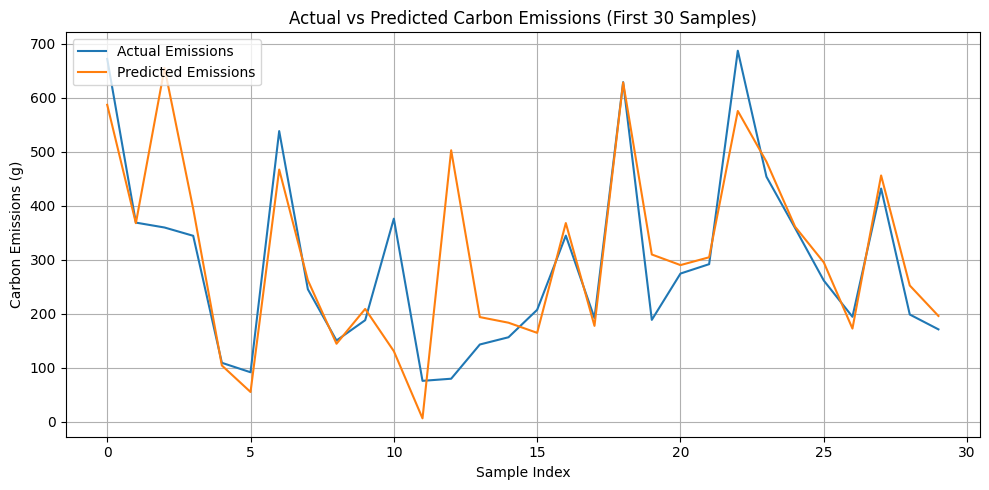

In [21]:
#  ACTUAL VS PREDICTED LINE GRAPH
plt.figure(figsize=(10, 5))
plt.plot(range(30), ytest.values[:30], label='Actual Emissions')
plt.plot(range(30), lr_pred[:30], label='Predicted Emissions')
plt.title('Actual vs Predicted Carbon Emissions (First 30 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Carbon Emissions (g)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

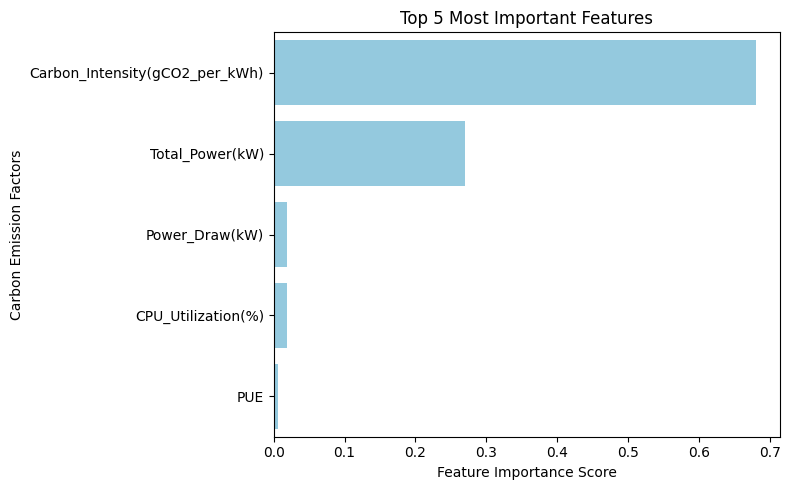

In [22]:
#  HORIZONTAL BAR GRAPH
importances = dt_model.feature_importances_
feat_names = x.columns

feature_df = pd.DataFrame({
    'Feature': feat_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(y='Feature', x='Importance', data=feature_df, color='skyblue')
plt.title("Top 5 Most Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Carbon Emission Factors")
plt.tight_layout()
plt.show()